## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import statistics

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_metadata_results = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_metadata_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
total_count = {'Total Mice':[len(combined_metadata_results['Mouse ID'].value_counts())]}
total_count_df = pd.DataFrame(total_count)
total_count_df

,Total Mice
0,249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_id = combined_metadata_results[combined_metadata_results.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_id_df = pd.DataFrame(duplicate_id)
duplicate_id_df

# print("Duplicate Rows based on 2 columns are:", duplicate_id_df, sep='\n')

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID

# Select all duplicate rows based on one column
duplicaterows_mouseid = combined_metadata_results[combined_metadata_results.duplicated(['Mouse ID'])]
duplicaterows_mouseid_df = pd.DataFrame(duplicaterows_mouseid)
duplicaterows_mouseid_df

# print("Duplicate Rows based on a single column are:", duplicaterows_mouseid_df, sep='\n')

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Total Duplicates  
total_dup_count = {'Total Duplicates':[combined_metadata_results.duplicated(["Mouse ID"]).sum()]}
total_dup_count_df = pd.DataFrame(total_dup_count)
total_dup_count_df

,Total Duplicates
0,1644


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# dropping ALL duplicte values 
clean_tumor_vol = combined_metadata_results.drop_duplicates(subset= ['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)'])
clean_tumor_vol_df = pd.DataFrame(clean_tumor_vol)

clean_results = clean_tumor_vol_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_results_df = pd.DataFrame(clean_results)
clean_results_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_total = {'Cleaned Total Mice':[clean_results_df.duplicated(subset=["Mouse ID"]).count()]}
clean_total_df = pd.DataFrame(clean_total)
clean_total_df

,Cleaned Total Mice
0,1888


In [8]:
# sorting by ID 
clean_results_df.sort_values("Mouse ID", inplace = True) 
clean_results_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
459,a203,Infubinol,Female,20,23,25,56.793208,1
462,a203,Infubinol,Female,20,23,40,63.593490,2
458,a203,Infubinol,Female,20,23,20,55.173336,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
456,a203,Infubinol,Female,20,23,10,51.852437,1
...,...,...,...,...,...,...,...,...
1887,z969,Naftisol,Male,9,30,20,57.898778,2
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation,and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

# mean of the tumor volume for each regimen
sum_tumor = clean_results_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sum()
counts_tumor = clean_results_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].count()
average_tumor = sum_tumor / counts_tumor 

# # median of the tumor volume for each regimen
median_tumor = clean_results_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()

# # variance of the tumor volume for each regimen
var_tumor = clean_results_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
 
# # standard deviation of the tumor volume for each regimen
std_tumor = clean_results_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std() 

# # SEM(standard error of the mean) of the tumor volume for each regimen
sem_mice_tumor = clean_results_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


# Print Summary Statistics Table 
summary_values_tumor = clean_results_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].nunique()
summary_table_tumor = summary_values_tumor.to_frame()

summary_table_tumor["Mean"] = average_tumor
summary_table_tumor["Median"] = median_tumor
summary_table_tumor["Variance"] = var_tumor
summary_table_tumor["Standard Deviation"] = std_tumor
summary_table_tumor["SEM"] = sem_mice_tumor

summary_table_tumor.astype(float).round(2)

,Tumor Volume (mm3),Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,
Capomulin,206.0,40.68,41.56,24.95,4.99,0.33
Ceftamin,154.0,52.59,51.78,39.29,6.27,0.47
Infubinol,154.0,52.88,51.82,43.13,6.57,0.49
Ketapril,164.0,55.24,53.70,68.55,8.28,0.60
Naftisol,162.0,54.33,52.51,66.17,8.13,0.60
Placebo,157.0,54.03,52.29,61.17,7.82,0.58
Propriva,132.0,52.39,50.91,43.14,6.57,0.53
Ramicane,204.0,40.22,40.67,23.49,4.85,0.32
Stelasyn,158.0,54.23,52.43,59.45,7.71,0.57


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

# mean of the tumor volume for each regimen
sum_tumor_vol = clean_results_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sum()
counts_tumor_vol = clean_results_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].count()
average = sum_tumor_vol / counts_tumor_vol 

# median of the tumor volume for each regimen
median = clean_results_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()

# variance of the tumor volume for each regimen
var = clean_results_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
 
# standard deviation of the tumor volume for each regimen
std = clean_results_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std() 

# SEM(standard error of the mean) of the tumor volume for each regimen
sem_mice = clean_results_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Summary Data
summary_values = clean_results_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].nunique()
summary_table = summary_values.to_frame()

summary_table["Mean"] = average
summary_table["Median"] = median
summary_table["Variance"] = var
summary_table["Standard Deviation"] = std
summary_table["SEM"] = sem_mice

summary_table.round(2)

,Tumor Volume (mm3),Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,
Capomulin,206,40.68,41.56,24.95,4.99,0.33
Ceftamin,154,52.59,51.78,39.29,6.27,0.47
Infubinol,154,52.88,51.82,43.13,6.57,0.49
Ketapril,164,55.24,53.70,68.55,8.28,0.60
Naftisol,162,54.33,52.51,66.17,8.13,0.60
Placebo,157,54.03,52.29,61.17,7.82,0.58
Propriva,132,52.39,50.91,43.14,6.57,0.53
Ramicane,204,40.22,40.67,23.49,4.85,0.32
Stelasyn,158,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

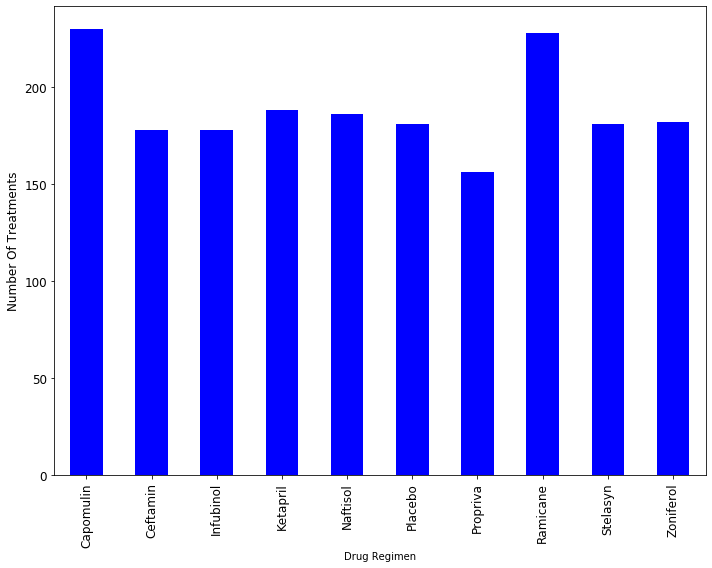

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_per_treatment = clean_results_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
bar_chart_pandas = mice_per_treatment.plot.bar(x="Drug Regimen", y="Tumor Volume (mm3)", 
                                               color="b", figsize=(10,8), fontsize = 12)
bar_chart_pandas

plt.ylabel("Number Of Treatments", fontsize =12)
plt.tight_layout()
plt.savefig("../Images/mice_per_treatment_pandas.png")
plt.show()

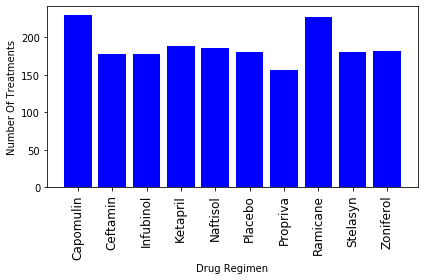

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drugs = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", 
         "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
mice_treatment = clean_results_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
x_axis = np.arange(len(mice_treatment))

plt.bar(x_axis, mice_treatment, color="b", align="center", width = 0.8)

plt.xlabel("Drug Regimen")
plt.ylabel("Number Of Treatments")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, labels=drugs, rotation="vertical", fontsize = 12)

plt.tight_layout()
plt.savefig("../Images/mice_per_treatment_pyplot.png")
plt.show()

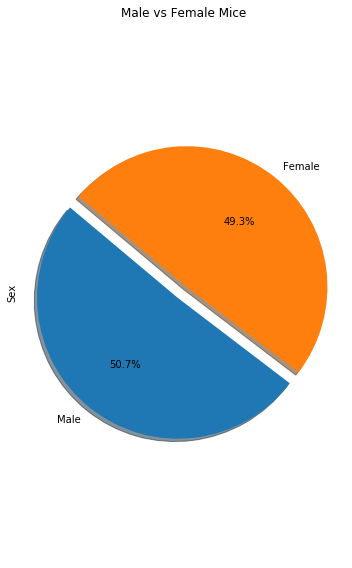

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
male_vs_female = clean_results_df['Sex'].value_counts().plot(kind='pie', y='Male vs Female', shadow= True,startangle= 140,
figsize= (5,8), autopct='%1.1f%%', explode= (0,0.1))

plt.axis('equal')
plt.title("Male vs Female Mice")

plt.tight_layout()
plt.savefig("../Images/male_vs_female_pandas_pandas.png")
plt.show()

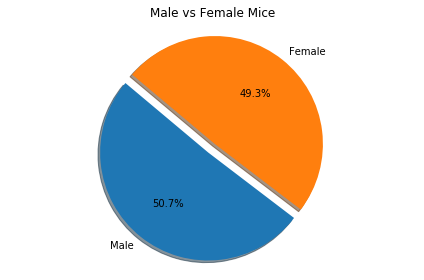

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
mices = clean_results_df["Sex"].value_counts()
explode = (0, 0.1)

plt.pie(mices, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.axis('equal')
plt.title("Male vs Female Mice")

plt.tight_layout()
plt.savefig("../Images/male_vs_female_pyplot.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df = clean_results_df.loc[clean_results_df['Drug Regimen'] == 'Capomulin']
ramicane_df = clean_results_df.loc[clean_results_df['Drug Regimen'] == 'Ramicane']
infubinol_df = clean_results_df.loc[clean_results_df['Drug Regimen'] == 'Infubinol']
ceftamin_df = clean_results_df.loc[clean_results_df['Drug Regimen'] == 'Ceftamin']

# Capomulin
# Start by getting the last (greatest) timepoint for each mouse
capomulin_last = capomulin_df.groupby("Mouse ID").max()["Timepoint"]
capomulin_last_df = pd.DataFrame(capomulin_last)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
capomulin_merge = pd.merge(capomulin_last_df, combined_metadata_results, on=("Mouse ID","Timepoint"))
capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [16]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
capomulin_tumor_vol = capomulin_merge['Tumor Volume (mm3)']

capomulin_quartiles = capomulin_tumor_vol.quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperq - capomulin_lowerq

print(f"The lower quartile of occupancy is: {capomulin_lowerq}")
print(f"The upper quartile of occupancy is: {capomulin_upperq}")
print(f"The interquartile range of occupancy is: {capomulin_iqr}")
print(f"The the median of occupancy is: {capomulin_quartiles[0.5]} ")

capomulin_lower_bound = capomulin_lowerq - (1.5 * capomulin_iqr)
capomulin_upper_bound = capomulin_upperq + (1.5 * capomulin_iqr)
print(f"Values below {capomulin_lower_bound} could be outliers.")
print(f"Values above {capomulin_upper_bound} could be outliers.")

The lower quartile of occupancy is: 32.37735684
The upper quartile of occupancy is: 40.1592203
The interquartile range of occupancy is: 7.781863460000004
The the median of occupancy is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [17]:
# RAmicane
# Start by getting the last (greatest) timepoint for each mouse
ramicane_last = ramicane_df.groupby("Mouse ID").max()["Timepoint"]
ramicane_last_df = pd.DataFrame(ramicane_last)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
ramicane_merge = pd.merge(ramicane_last_df, combined_metadata_results, on=("Mouse ID","Timepoint"))
ramicane_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [18]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
ramicane_tumor_vol = ramicane_merge['Tumor Volume (mm3)']

ramicane_quartiles = ramicane_tumor_vol.quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[0.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperq - ramicane_lowerq

print(f"The lower quartile of occupancy is: {ramicane_lowerq}")
print(f"The upper quartile of occupancy is: {ramicane_upperq}")
print(f"The interquartile range of occupancy is: {ramicane_iqr}")
print(f"The the median of occupancy is: {ramicane_quartiles[0.5]} ")

ramicane_lower_bound = ramicane_lowerq - (1.5 * ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5 * ramicane_iqr)
print(f"Values below {ramicane_lower_bound} could be outliers.")
print(f"Values above {ramicane_upper_bound} could be outliers.")

The lower quartile of occupancy is: 31.56046955
The upper quartile of occupancy is: 40.65900627
The interquartile range of occupancy is: 9.098536719999998
The the median of occupancy is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [19]:
# Infubinol
# Start by getting the last (greatest) timepoint for each mouse
infubinol_last = infubinol_df.groupby("Mouse ID").max()["Timepoint"]
infubinol_last_df = pd.DataFrame(infubinol_last)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
infubinol_merge = pd.merge(infubinol_last_df, combined_metadata_results, on=("Mouse ID","Timepoint"))
infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [20]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
infubinol_tumor_vol = infubinol_merge['Tumor Volume (mm3)']

infubinol_quartiles = infubinol_tumor_vol.quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quartiles[0.25]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upperq - infubinol_lowerq

print(f"The lower quartile of occupancy is: {infubinol_lowerq}")
print(f"The upper quartile of occupancy is: {infubinol_upperq}")
print(f"The interquartile range of occupancy is: {infubinol_iqr}")
print(f"The the median of occupancy is: {infubinol_quartiles[0.5]} ")

infubinol_lower_bound = infubinol_lowerq - (1.5 * infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5 * infubinol_iqr)
print(f"Values below {infubinol_lower_bound} could be outliers.")
print(f"Values above {infubinol_upper_bound} could be outliers.")

The lower quartile of occupancy is: 54.04860769
The upper quartile of occupancy is: 65.52574285
The interquartile range of occupancy is: 11.477135160000003
The the median of occupancy is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [21]:
# Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
ceftamin_last = ceftamin_df.groupby("Mouse ID").max()["Timepoint"]
ceftamin_last_df = pd.DataFrame(ceftamin_last)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
ceftamin_merge = pd.merge(ceftamin_last_df, combined_metadata_results, on=("Mouse ID","Timepoint"))
ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [22]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
ceftamin_tumor_vol = ceftamin_merge['Tumor Volume (mm3)']

ceftamin_quartiles = ceftamin_tumor_vol.quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq - ceftamin_lowerq

print(f"The lower quartile of occupancy is: {ceftamin_lowerq}")
print(f"The upper quartile of occupancy is: {ceftamin_upperq}")
print(f"The interquartile range of occupancy is: {ceftamin_iqr}")
print(f"The the median of occupancy is: {ceftamin_quartiles[0.5]} ")

ceftamin_lower_bound = ceftamin_lowerq - (1.5 * ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5 * ceftamin_iqr)
print(f"Values below {ceftamin_lower_bound} could be outliers.")
print(f"Values above {ceftamin_upper_bound} could be outliers.")

The lower quartile of occupancy is: 48.72207785
The upper quartile of occupancy is: 64.29983003
The interquartile range of occupancy is: 15.577752179999997
The the median of occupancy is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [23]:
# Sum of Final Tumor Volume (mm3) for each regimens
capomulin_sum_final_tumor = capomulin_merge.groupby("Mouse ID").max()["Tumor Volume (mm3)"].sum()
ramicane_sum_final_tumor = ramicane_merge.groupby("Mouse ID").max()["Tumor Volume (mm3)"].sum()
infubinol_sum_final_tumor = infubinol_merge.groupby("Mouse ID").max()["Tumor Volume (mm3)"].sum()
ceftamin_sum_final_tumor = ceftamin_merge.groupby("Mouse ID").max()["Tumor Volume (mm3)"].sum()

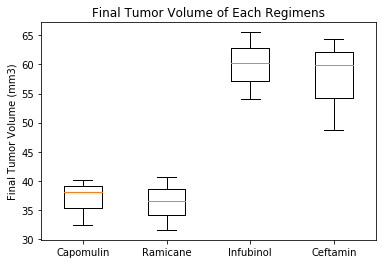

<Figure size 576x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

final_tumor_vol = [capomulin_quartiles, ramicane_quartiles, infubinol_quartiles, ceftamin_quartiles]
regimens = ['Capomulin','Ramicane','Infubinol','Ceftamin']

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume of Each Regimens')
# ax1.set_xlabel('Capomulin' 'Ramicane' 'Infubinol' 'Ceftamin')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(final_tumor_vol, labels=regimens)
fig = plt.figure(figsize =(8, 10)) 
plt.show()

plt.savefig("../Images/final_tumor_volume_box_plot.png")
plt.show()

## Line and Scatter Plots

In [25]:
# mouse id = b128
capomulin_b128 = clean_results_df.loc[clean_results_df['Mouse ID'] == 'b128']
capomulin_b128

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
309,b128,Capomulin,Female,9,22,45,38.982878,2
308,b128,Capomulin,Female,9,22,40,38.379726,2
307,b128,Capomulin,Female,9,22,35,37.967644,1
306,b128,Capomulin,Female,9,22,30,40.605335,1
305,b128,Capomulin,Female,9,22,25,43.262145,1
304,b128,Capomulin,Female,9,22,20,42.731552,0


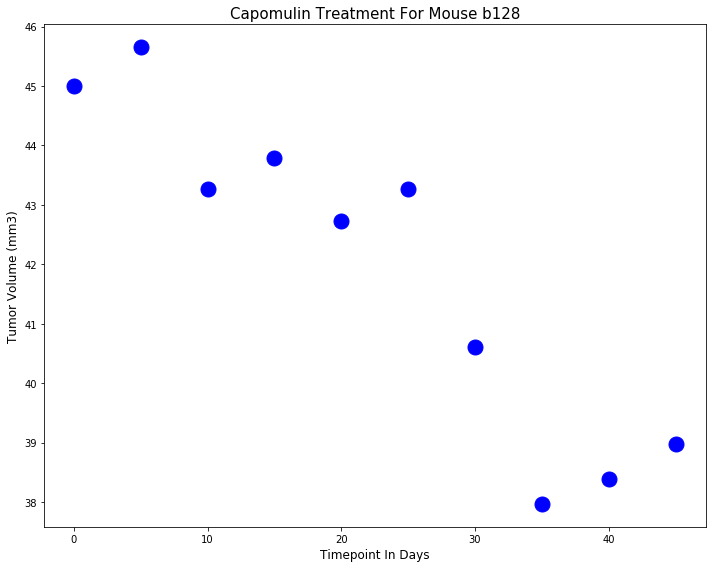

In [26]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Create the X and Y axis lists
x_axis_timepoint_in_days = [capomulin_b128['Timepoint']]
y_axis_tumor = [capomulin_b128['Tumor Volume (mm3)']]

# Plot the charts and apply some styling
fig1, ax1 = plt.subplots(figsize=(10,8))

plt.plot(x_axis_timepoint_in_days, y_axis_tumor, marker="o", color="blue", linewidth=2, markersize=15)

plt.title("Capomulin Treatment For Mouse b128", fontsize=15)
plt.xlabel("Timepoint In Days", fontsize =12)
plt.ylabel("Tumor Volume (mm3)", fontsize =12)
plt.tight_layout()
plt.savefig("../Images/Capomulin_Treatment_b128_line_plot.png")
plt.show()

In [27]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Locate Capomulin in the data 
capomulin = clean_results_df.loc[clean_results_df['Drug Regimen'] == 'Capomulin']
capomulin_df = pd.DataFrame(capomulin)
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
309,b128,Capomulin,Female,9,22,45,38.982878,2
...,...,...,...,...,...,...,...,...
119,y793,Capomulin,Male,17,17,20,40.716428,2
120,y793,Capomulin,Male,17,17,25,38.992734,2
121,y793,Capomulin,Male,17,17,30,35.726023,2
116,y793,Capomulin,Male,17,17,5,41.019913,0


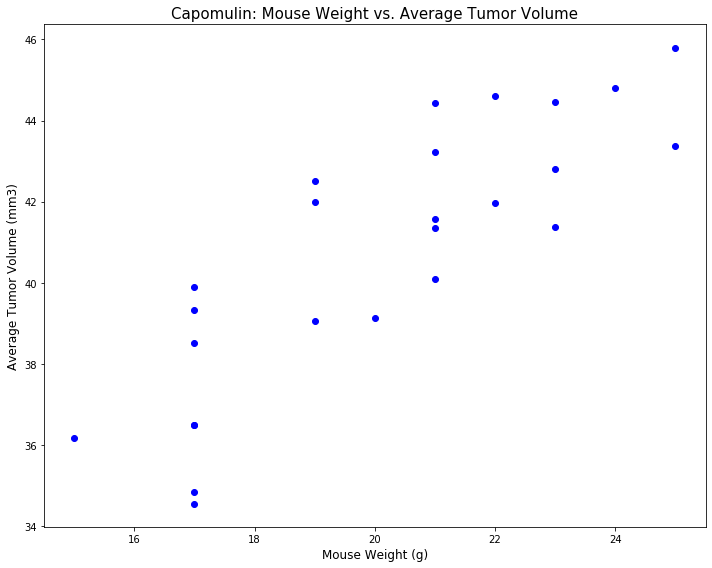

In [28]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
fig1, ax1 = plt.subplots(figsize=(10,8))

average_tumor = capomulin_df.groupby(['Mouse ID']).mean()

plt.scatter(average_tumor['Weight (g)'], average_tumor['Tumor Volume (mm3)'], 
            marker="o", color="blue")

plt.title("Capomulin: Mouse Weight vs. Average Tumor Volume", fontsize = 15)
plt.xlabel("Mouse Weight (g)", fontsize = 12)
plt.ylabel("Average Tumor Volume (mm3)", fontsize = 12)
plt.tight_layout()
plt.savefig("../Images/Capomulin_Weight_vs_AvgTumorVol_line_plot.png")
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84


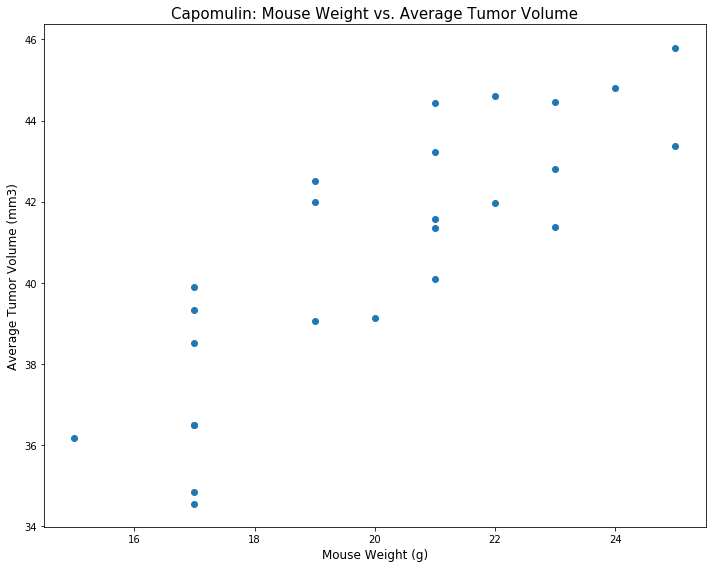

In [29]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
fig1, ax1 = plt.subplots(figsize=(10,8))

weight = average_tumor['Weight (g)']
average_tumor_vol = average_tumor['Tumor Volume (mm3)']

correlation = st.pearsonr(weight,average_tumor_vol)

plt.scatter(weight,average_tumor_vol)
plt.title("Capomulin: Mouse Weight vs. Average Tumor Volume", fontsize = 15)
plt.xlabel('Mouse Weight (g)', fontsize = 12)
plt.ylabel('Average Tumor Volume (mm3)', fontsize = 12)

print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.tight_layout()
plt.savefig("../Images/Capomulin_Weight_vs_AvgTumorVol_correlation.png")
plt.show()

In [30]:
from scipy.stats import linregress
from sklearn import datasets

In [31]:
weight = average_tumor['Weight (g)']
average_tumor_vol = average_tumor['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, average_tumor_vol)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'slope: {slope}')
print(f'intercept: {intercept}')
print(f'rvalue: {rvalue}')
print(f'pvalue: {pvalue}')
print(f'stderr: {stderr}')
# print(f'regression values{regress_values}')
print(f'line equation: {line_eq}')


slope: 0.9544396890241051
intercept: 21.552160532685
rvalue: 0.8419363424694721
pvalue: 1.3225722434712404e-07
stderr: 0.1275435903320133
line equation: y = 0.95x + 21.55


The r-squared is: 0.7088568047708723


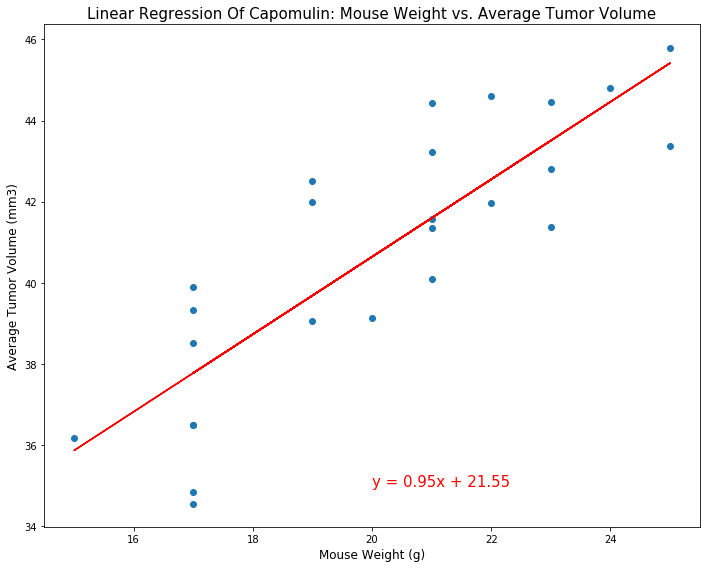

In [32]:
# Perform a linear regression for mouse weight and average tumor volume for the Capomulin regimen 

fig1, ax1 = plt.subplots(figsize=(10,8))

weight = average_tumor['Weight (g)']
average_tumor_vol = average_tumor['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, average_tumor_vol)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(weight,average_tumor_vol)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")

plt.title("Linear Regression Of Capomulin: Mouse Weight vs. Average Tumor Volume", fontsize = 15)
plt.xlabel('Mouse Weight (g)', fontsize = 12)
plt.ylabel('Average Tumor Volume (mm3)', fontsize = 12)

print(f"The r-squared is: {rvalue**2}")

plt.tight_layout()
plt.savefig("../Images/Capomulin_Weight_vs_AvgTumorVol_LinearRegression.png")
plt.show()